# 1. tesnsorflow v2.x에서 v1사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [5]:
# 간단한 수학 연산 수행(graph)
# 그래프 정의
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
node3 = tf.add(node1, node2)

# 그래프 실행
sess = tf.Session()
print(sess.run([node1,node2, node3]))


[10.0, 20.0, 30.0]


# Tesnsorflow
    - 그래프 정의
    - sess = tf.Session()를 실행
    - sess.run()을 통해 값을 확인할 수 있음

In [6]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run([node2, node1]))

[array([1., 2., 3.], dtype=float32), array([1, 2, 3], dtype=int16)]


In [9]:
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data) #reduce_mean: 평균값 계산
print(m)
sess = tf.Session()
print(sess.run(m))

Tensor("Mean_2:0", shape=(), dtype=float64)
2.5


<function matplotlib.pyplot.show(close=None, block=None)>

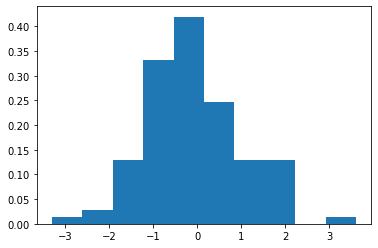

In [11]:
import matplotlib.pyplot as plt
tensor = tf.random_normal([100]) #random_normal : 평균0이고 표준편차가 0인 난수
sess = tf.Session()
plt.hist(sess.run(tensor), density=True)
plt.show

In [12]:
print(sess.run(tensor))

[ 0.23167956  1.2789688  -1.0112778  -0.45265856  0.10362315  0.17287597
 -1.7735801  -0.21805198  2.7828646   0.49727365  0.1689237  -0.9234495
 -0.6147419  -0.78659    -0.14890717  0.6469524   0.6370679   0.5518822
  1.5149355  -0.39095312 -1.5217409  -0.46400973  1.5639547   0.2272351
 -0.94997454  1.1722673   0.55511516 -1.9724544   0.29659015  1.0046415
 -0.7931983   0.5014279   0.25693664  0.59464043  0.2898554   0.992195
  1.2118466   0.82000065  1.5315236  -1.4281954   0.18908639 -0.13212869
 -1.3734797  -0.6781706   1.1552631   1.3103827  -0.17487223 -1.0314972
 -0.4672962   0.83636856 -1.0040562  -0.55027837 -0.31903684  0.95699525
  1.493249    0.98865986 -0.20304918  0.50526273 -0.8649662   1.0407366
 -1.5457842   1.3575656  -2.210081   -0.37611416  1.2938565  -1.1787734
 -0.7021091  -0.9791036   1.9531065  -0.836543    0.44788766 -0.5317428
 -0.84559983  0.1991816   1.6632138  -1.3512479   0.37672088  1.1092261
 -0.5842937  -0.6396645   0.20116565  0.63071185  0.45317388 -

# 2. tensorflow v1을 이용한 linear regression 을 구현

## 2.1 독립변수 x가 한개

In [17]:
# tensor graph 정의
# train data set
x = np.array([1,2,3])
y = np.array([1,2,3])

# Weight와 Bais (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hyoithesis
H = W*x + b

# cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H - y))

#우리의 목적인 cost가 최소가 되는 w와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session
sess = tf.Session()

# variable 노드 (W,b) 초기화
sess.run(tf.global_variables_initializer())

#6000번 학습 (v2에서는 fit함수)
# for step in range(1,6001):
#     sess.run(train)
#     if step%300 == 0:
#         print("{}번째 학습시 cost:{}, w값:{}, b값:{}".format(step, sess.run(cost), sess.run(W), sess.run(b)))

for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300 == 0:
        print("{}번째 학습시 cost:{}, w값:{}, b값:{}".format(step, sess.run(cost), sess.run(W), sess.run(b)))

300번째 학습시 cost:0.0019855478312820196, w값:[0.9482469], b값:[0.11764683]
600번째 학습시 cost:0.0004685079911723733, w값:[0.97486067], b값:[0.05714772]
900번째 학습시 cost:0.00011054810602217913, w값:[0.98778844], b값:[0.02775978]
1200번째 학습시 cost:2.6085535864694975e-05, w값:[0.9940681], b값:[0.01348462]
1500번째 학습시 cost:6.155008577479748e-06, w값:[0.99711853], b값:[0.00655024]
1800번째 학습시 cost:1.4525008964483277e-06, w값:[0.99860024], b값:[0.00318199]
2100번째 학습시 cost:3.42904996841753e-07, w값:[0.9993199], b값:[0.00154597]
2400번째 학습시 cost:8.101174131525113e-08, w값:[0.9996694], b값:[0.0007515]
2700번째 학습시 cost:1.9182765598202423e-08, w값:[0.9998391], b값:[0.00036572]
3000번째 학습시 cost:4.555098076508557e-09, w값:[0.99992144], b값:[0.00017822]
3300번째 학습시 cost:1.0821652463022247e-09, w값:[0.99996185], b값:[8.6878725e-05]
3600번째 학습시 cost:2.599175319417668e-10, w값:[0.9999814], b값:[4.2611842e-05]
3900번째 학습시 cost:6.1452246069571e-11, w값:[0.9999909], b값:[2.0634901e-05]
4200번째 학습시 cost:1.7999742321639367e-11, w값:[0.9999949], b값:[1.11

In [18]:
sess.run([W,b]) #최종 6000번 학습시 나온 결과

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [19]:
W_, b_ = sess.run([W,b])

In [20]:
print('최종적으로 나온 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종적으로 나온 회귀식 : H = 0.9999977350234985*x + 4.490227638598299e-06


In [22]:
# tensor graph 정의
x = [1,2,3]
y = [1,2,3]

#W와 Bias
W = tf.Variable(100.0, name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
#Hypothesis
H = W*x + b
#cost(최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session
sess = tf.Session()
# b노드 초기화
sess.run(tf.global_variables_initializer())
# 4000번 학습
for step in range(1,4001):
    cost_val, W_val, b_val = sess.run([cost,W, b])
    if step%100 == 1:
        print("{}번째 cost:{}, w:{}, b:{}".format(step, sess.run(cost), sess.run(W), sess.run(b)))
    sess.run(train)

1번째 cost:46234.37890625, w:100.0, b:[1.2495348]
101번째 cost:111.35415649414062, w:13.25666332244873, b:[-27.86051]
201번째 cost:68.81012725830078, w:10.634343147277832, b:[-21.901127]
301번째 cost:42.52046585083008, w:8.573471069335938, b:[-17.21628]
401번째 cost:26.27508544921875, w:6.953440189361572, b:[-13.533569]
501번째 cost:16.236417770385742, w:5.679947853088379, b:[-10.638621]
601번째 cost:10.033125877380371, w:4.678867340087891, b:[-8.362929]
701번째 cost:6.199859142303467, w:3.8919239044189453, b:[-6.574023]
801번째 cost:3.8311328887939453, w:3.273314952850342, b:[-5.167779]
901번째 cost:2.3674075603485107, w:2.78703236579895, b:[-4.062345]
1001번째 cost:1.4629135131835938, w:2.4047703742980957, b:[-3.1933727]
1101번째 cost:0.9039918780326843, w:2.1042776107788086, b:[-2.5102823]
1201번째 cost:0.5586122274398804, w:1.8680628538131714, b:[-1.973311]
1301번째 cost:0.3451886475086212, w:1.682376742362976, b:[-1.5512028]
1401번째 cost:0.21330559253692627, w:1.5364103317260742, b:[-1.2193866]
1501번째 cost:0.

## 2.2 predict를 하기 위한 placeholder 이용

In [27]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
#ab = tf.add(a,b)
ab = a+b
sess = tf.Session()
# placeholder는 그래프 실행단계에서 값을 던져줌
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [25]:
sess.run(a, feed_dict={a:[1,2,3]})

array([1., 2., 3.], dtype=float32)

In [34]:
# data set(H = 2x +3)
x_data = [1, 2, 3]
y_data = [5, 7, 9]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost function
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번째 cost:{}, w:{}, b:{}".format(step, cost_val, W_val, b_val))


200번째 cost:0.09065674990415573, w:[2.3488595], b:[2.2069604]
400번째 cost:0.03461718186736107, w:[2.215574], b:[2.5099494]
600번째 cost:0.013218495063483715, w:[2.1332116], b:[2.6971788]
800번째 cost:0.005047468934208155, w:[2.0823169], b:[2.812875]
1000번째 cost:0.0019273930229246616, w:[2.0508668], b:[2.8843677]
1200번째 cost:0.0007359792361967266, w:[2.0314329], b:[2.9285457]
1400번째 cost:0.0002810265577863902, w:[2.0194232], b:[2.955846]
1600번째 cost:0.0001073182575055398, w:[2.0120027], b:[2.9727147]
1800번째 cost:4.097756391274743e-05, w:[2.007417], b:[2.9831398]
2000번째 cost:1.5646202882635407e-05, w:[2.0045831], b:[2.9895818]
2200번째 cost:5.9759126997960266e-06, w:[2.0028324], b:[2.9935613]
2400번째 cost:2.2835590698377928e-06, w:[2.0017512], b:[2.9960194]
2600번째 cost:8.745097943574365e-07, w:[2.0010839], b:[2.9975374]
2800번째 cost:3.34888682118617e-07, w:[2.0006707], b:[2.9984756]
3000번째 cost:1.2845400476635405e-07, w:[2.0004158], b:[2.999056]
3200번째 cost:4.997461289235616e-08, w:[2.0002587], b:

In [35]:
sess.run([W,b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [37]:
# 예측해 보기
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [38]:
sess.run(H, feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.3 scale이 다른 데이터들의 linear regression을 구현

In [39]:
x_data=[1,2,5,8,10]
y_data=[5,15,68,80,95]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost function
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번째 cost:{}, w:{}, b:{}".format(step, cost_val, W_val, b_val))


200번째 cost:79.26651763916016, w:[10.072938], b:[0.41233042]
400번째 cost:79.1511001586914, w:[10.133535], b:[-0.03634367]
600번째 cost:79.1405258178711, w:[10.151889], b:[-0.17224371]
800번째 cost:79.13954162597656, w:[10.157449], b:[-0.21340734]
1000번째 cost:79.13945007324219, w:[10.159133], b:[-0.22587481]
1200번째 cost:79.13945007324219, w:[10.159642], b:[-0.22965173]
1400번째 cost:79.13946533203125, w:[10.159797], b:[-0.23079547]
1600번째 cost:79.13945770263672, w:[10.159843], b:[-0.23114187]
1800번째 cost:79.13946533203125, w:[10.159858], b:[-0.23124658]
2000번째 cost:79.13944244384766, w:[10.159862], b:[-0.23127525]
2200번째 cost:79.13944244384766, w:[10.1598625], b:[-0.23128292]
2400번째 cost:79.13946533203125, w:[10.1598625], b:[-0.23128368]
2600번째 cost:79.13946533203125, w:[10.1598625], b:[-0.23128368]
2800번째 cost:79.13946533203125, w:[10.1598625], b:[-0.23128368]
3000번째 cost:79.13946533203125, w:[10.1598625], b:[-0.23128368]
3200번째 cost:79.13946533203125, w:[10.1598625], b:[-0.23128368]
3400번째 co